#  Plotting and Data Pipelines

## Imports

In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Exploratory Data Engineering

In [2]:
heart_data = pd.read_csv("data/heart_unclean.csv")
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,NaN,1.0
4,54.0,M,NAP,150.0,NaN,0.0,Normal,122.0,N,0.0,Up,0.0


In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             901 non-null    float64
 1   Sex             906 non-null    object 
 2   ChestPainType   900 non-null    object 
 3   RestingBP       899 non-null    float64
 4   Cholesterol     900 non-null    float64
 5   FastingBS       904 non-null    float64
 6   RestingECG      898 non-null    object 
 7   MaxHR           892 non-null    float64
 8   ExerciseAngina  896 non-null    object 
 9   Oldpeak         896 non-null    float64
 10  ST_Slope        897 non-null    object 
 11  HeartDisease    898 non-null    float64
dtypes: float64(7), object(5)
memory usage: 86.2+ KB


In [4]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,901.000000,899.000000,900.000000,904.000000,892.000000,896.000000,898.000000
mean,53.489456,132.395996,198.657778,0.231195,136.706278,0.876897,0.550111
std,9.452639,18.482551,109.555724,0.421830,25.481514,1.060458,0.497760
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,172.750000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Count NaN / Null values

In [5]:
heart_data.isnull().sum().sort_values(ascending=False)

MaxHR             26
ExerciseAngina    22
Oldpeak           22
ST_Slope          21
RestingECG        20
HeartDisease      20
RestingBP         19
ChestPainType     18
Cholesterol       18
Age               17
FastingBS         14
Sex               12
dtype: int64

## Plotting Numerical and Categorial Features

In [6]:
%matplotlib inline

In [7]:
numeric_features = ["Age", "RestingBP",
                    "Cholesterol", "MaxHR", "Oldpeak", "FastingBS"]
categorical_features = [
    "Sex",
    "ChestPainType",
    "RestingECG",
    "ExerciseAngina",
    "ST_Slope",
]

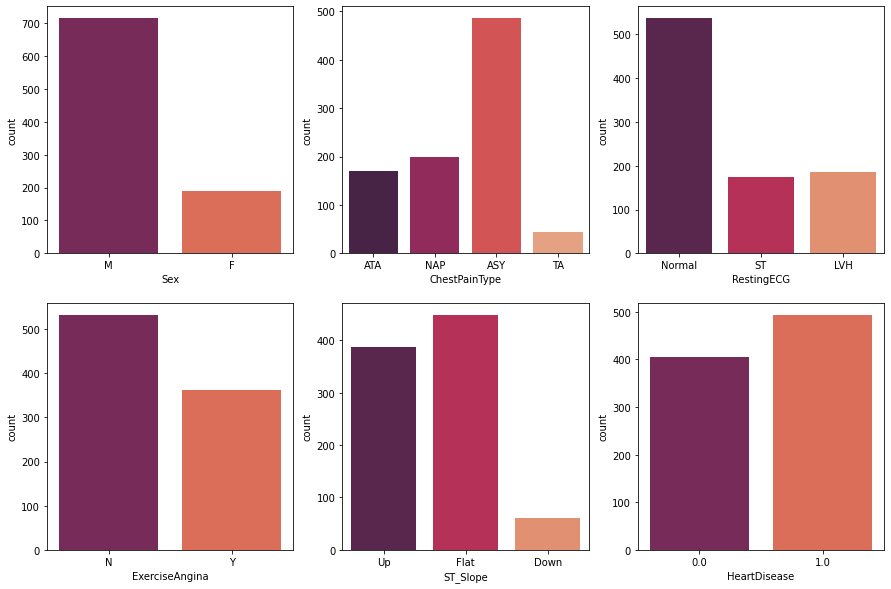

In [8]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, k in enumerate(categorical_features + ["HeartDisease"]):
    sns.countplot(x=heart_data[k], data=heart_data,
                  palette="rocket", ax=axes.flat[i])
plt.show()

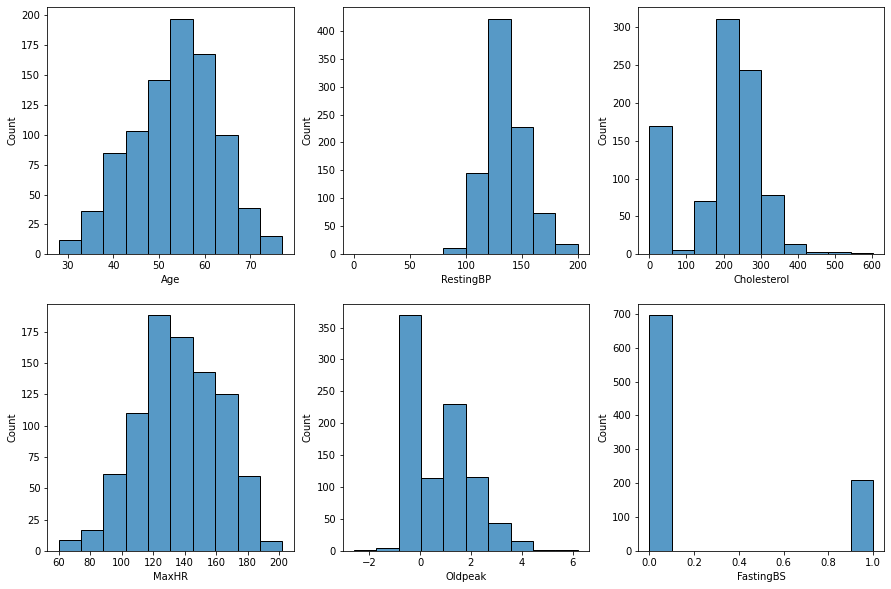

In [9]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, k in enumerate([x for x in numeric_features]):
    cat = heart_data[k].unique()
    sns.histplot(
        x=heart_data[k], data=heart_data[k], palette="rocket", ax=axes.flat[i], bins=10
    )
plt.show()

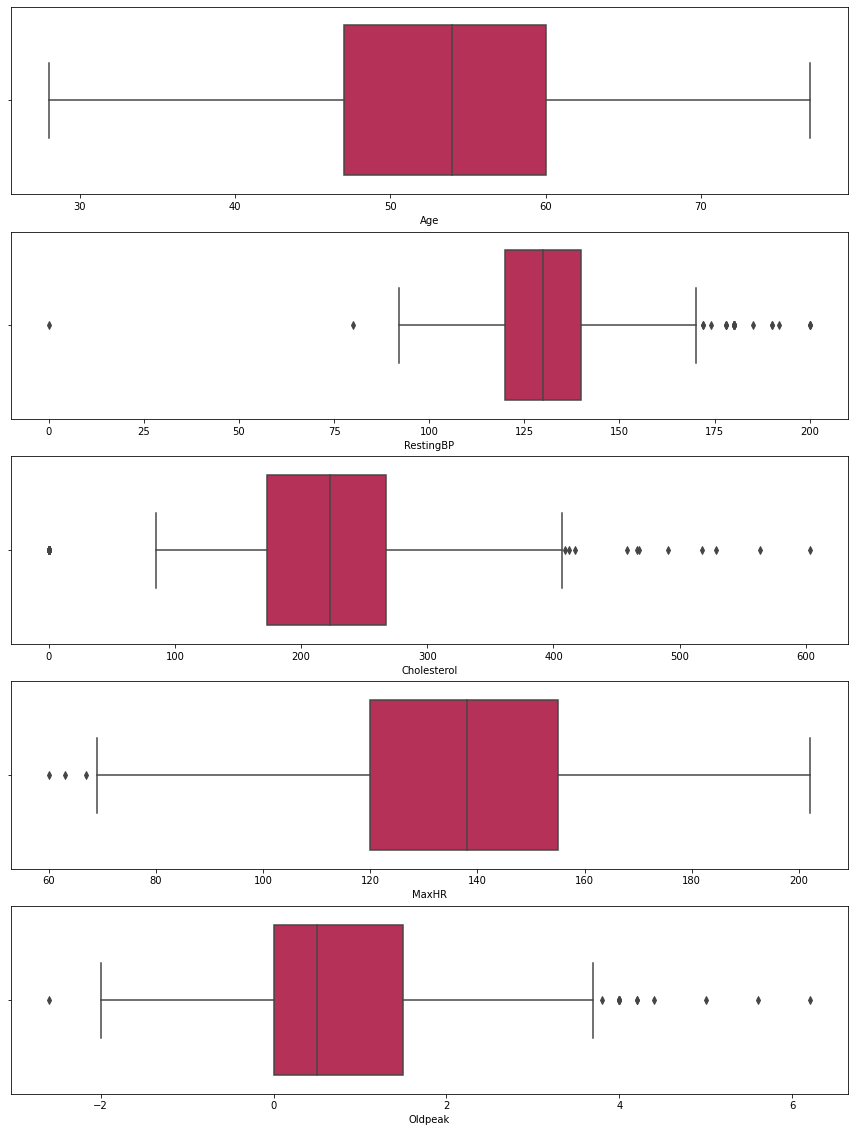

In [10]:
f, axes = plt.subplots(len(numeric_features) - 1, 1, figsize=(15, 20))

for i, k in enumerate([x for x in numeric_features if x != "FastingBS"]):
    sns.boxplot(
        x=heart_data[k],
        data=heart_data[k],
        palette="rocket",
        ax=axes.flat[i],
        orient="h",
    )
plt.show()

## Categorial Encoding

### One Hot Encoder

#### Beispieldaten

In [11]:
onehot_enc = OneHotEncoder(handle_unknown='ignore')

X = pd.DataFrame(data=['Apfel', 'Birne', 'Olivenöl'], columns=['Speise'])

#### FIT - generiert die Kategorien

In [12]:
onehot_enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [13]:
# Kategorien
onehot_enc.categories_

[array(['Apfel', 'Birne', 'Olivenöl'], dtype=object)]

In [14]:
# Transformation der Daten
X2 = pd.DataFrame(data=['Birne', 'Birne', 'Apfel',
                  'Birne', 'Olivenöl'], columns=['Speise'])
onehot_enc.transform(X2).toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [15]:
onehot_enc.inverse_transform([[1, 0, 0], [0, 1, 0]])

array([['Apfel'],
       ['Birne']], dtype=object)

### Label Encoder

In [16]:
le = LabelEncoder()
le.fit(["Orange", "Apfel", "Birne"])

LabelEncoder()

In [17]:
le.classes_

array(['Apfel', 'Birne', 'Orange'], dtype='<U6')

In [18]:
le.transform(['Birne', 'Birne', 'Apfel', 'Orange'])

array([1, 1, 0, 2])

In [19]:
le.inverse_transform([0, 0, 1, 2])

array(['Apfel', 'Apfel', 'Birne', 'Orange'], dtype='<U6')

### Scaling

In [20]:
scaler = StandardScaler()
age = heart_data['Age']

In [21]:
# Mean und Var vor der Skalierung
print("Mean: ", age.mean(), "Variance: ", age.var())

Mean:  53.48945615982242 Variance:  89.35238870390923


In [22]:
heart_copy = heart_data.copy()
# fit_transform initialisiert den scaler und führt ihn direkt aus
heart_copy['Age'] = scaler.fit_transform(heart_data[['Age']])

scaled_age = heart_copy['Age']
print("Mean: ", scaled_age.mean(), "Variance: ", scaled_age.var())

Mean:  3.2407175968525657e-16 Variance:  1.0011111111111093


### Imputer: Einfügen von fehlenden Werten

In [23]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,NaN,1.0
4,54.0,M,NAP,150.0,NaN,0.0,Normal,122.0,N,0.0,Up,0.0


In [24]:
# Beispiel für einen fehlenden Cholestrinwert
heart_data.iloc[4:5]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
4,54.0,M,NAP,150.0,NaN,0.0,Normal,122.0,N,0.0,Up,0.0


In [25]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(heart_data[['Cholesterol']])
heart_copy = heart_data.copy()
heart_copy['Cholesterol'] = imputer.transform(heart_data[['Cholesterol']])
heart_copy.iloc[4:5]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
4,54.0,M,NAP,150.0,198.657778,0.0,Normal,122.0,N,0.0,Up,0.0


### Aufgabe: bauen Sie einen Imputer für ST_Slope

## Generate Data Pipeline

In [26]:
heart_num = heart_data[numeric_features]
heart_cat = heart_data[categorical_features]

In [27]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)